# Recovering the first TESS Planet Candidate Using the *Lightkurve* Package

This tutorial is almost entirely from the [TESS *Lightkurve* Tutorial](https://colab.research.google.com/github/KeplerGO/lightkurve/blob/master/docs/source/tutorials/02-how-to-recover-the-first-tess-candidate.ipynb#scrollTo=Ly6zjNqvzIqW) written by Geert Barentsen.

This is a quick tutorial on how to get started using *Lightkurve* to access and analyze the TESS data. This tutorial takes a look at the target Pi Mensae (Tess Input Catalog ID 261136679) which was the first planet candidate discovered in the TESS data by [Huang et al. (2018)](https://arxiv.org/abs/1809.05967). We're going to use *Lightkurve* to rediscover the candidate.

To detect a transiting exoplanet, we observe the brightness of a star over time. A transiting exoplanet should create a dip in brightness corresponding to radial size of the orbiting planet. TESS takes images of ~200,000 stars every two minutes, and millions-to-billions stars every half hour. Pi Mensae is one of the stars that is observed every two minutes by the TESS mission. These observations are optical images, called Target Pixel Files (TPFs) and stored online for public access.

In [1]:
#! pip install lightkurve

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [1]:
from lightkurve import TessTargetPixelFile
import numpy as np

%matplotlib inline

In [3]:
#We use Lightkurve to download the file
tpf = TessTargetPixelFile('https://archive.stsci.edu/hlsps/tess-data-alerts/hlsp_tess-data-alerts_tess_phot_00261136679-s01_tess_v1_tp.fits')

The `TessTargetPixelFile` class in *Lightkurve* has some handy commands for exploring the meta data of the TPF that you downloaded.

In [4]:
#Lightkurve also works with Kepler. Use this to check which mission you're working with.
tpf.mission

'TESS'

In [5]:
tpf.targetid #TIC id

261136679

We can use *Lightkurve* to look directly at the images in the TPF for Pi Mensae. Let's look at the TPF with the default TESS pipeline mask applied to select our target star.

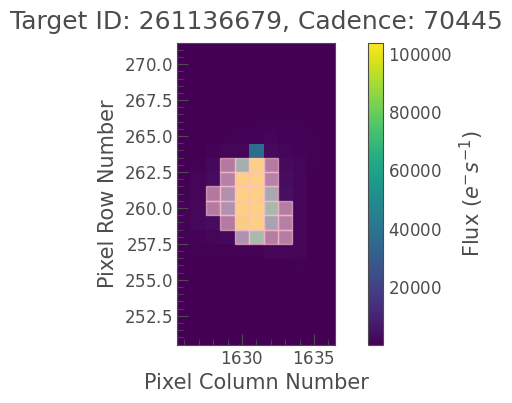

In [6]:
tpf.plot(aperture_mask=tpf.pipeline_mask)

We can see that this mask is not ideal, it doesn't include all of the pixels from our target star. We can use `numpy` to create a better mask that allows the position of the star to move on the CCD over time.

In [7]:
#Create a median image of the target object over time
#Google the documentation for np.nanmedian to see what `axis` means
median_image = np.nanmedian(tpf.flux, axis=0)

In [8]:
#Select pixels brighter than the 85th percentile in the median image for a new mask
aperture_mask = median_image > np.nanpercentile(median_image, 85)

In the following cell plot your new mask on the target pixel file. Does it cover all of the pixels of the target star?

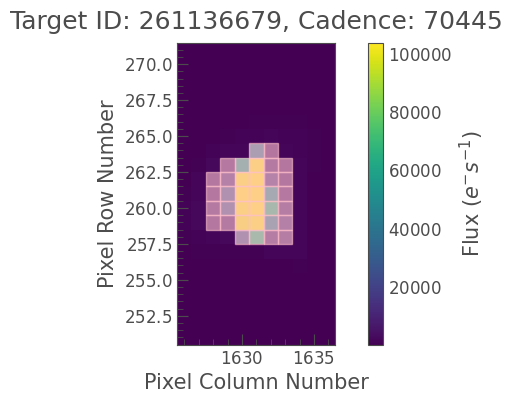

In [9]:
#Use the commands above to look at your new mask.
tpf.plot(aperture_mask=aperture_mask)

Now we can use the better aperture you made to extract the light curve from the TPFs with the `to_lightcurve()` function.

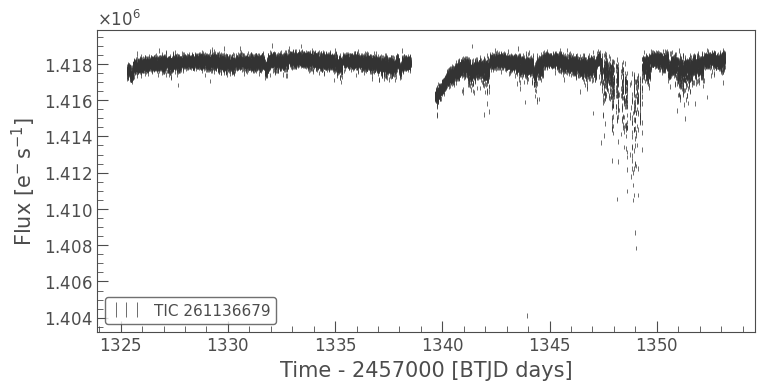

In [10]:
lc = tpf.to_lightcurve(aperture_mask=aperture_mask)
lc.errorbar()

In the following cell plot the lightcurve from the default mask and the median percentile mask. Which lightcurve looks less noisy?

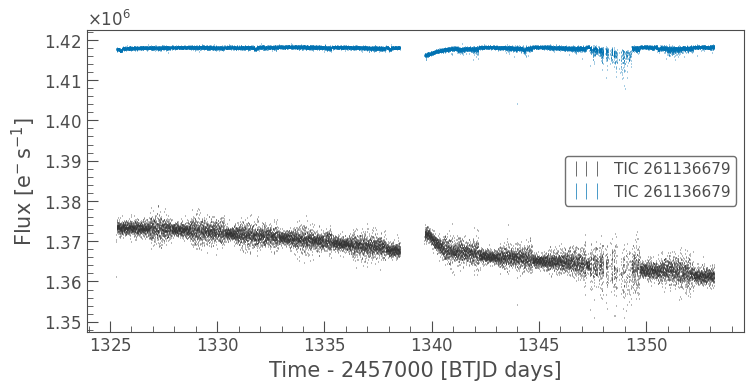

In [11]:
ax1=tpf.to_lightcurve().errorbar()
lc = tpf.to_lightcurve(aperture_mask=aperture_mask)
lc.errorbar(ax=ax1)

It's starting to look like there might be a planet in the data. Let's fold the lightcurve on the planet period. Look in [Huang et al. (2018)](https://arxiv.org/abs/1809.05967) to find the orbital period of the planet and the time of transit, known as t0.

In [67]:
huang_period = 6.27
huang_t0 = 1325.504
import astropy.units as u

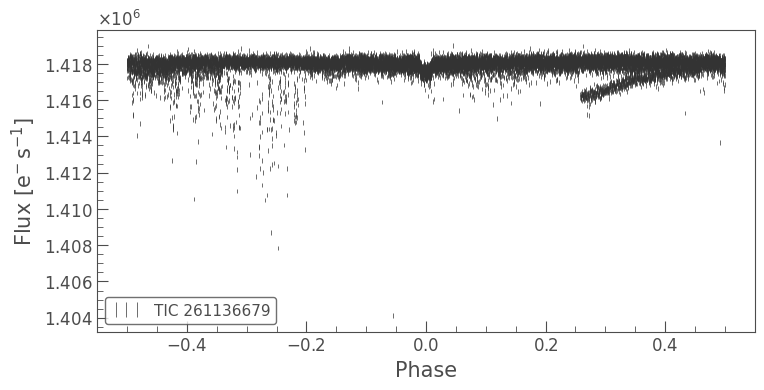

In [16]:
folded_lc = lc.fold(period=huang_period, t0 = huang_t0)
folded_lc.errorbar()

### Making the curve better as per Geert's tutorial

## Assignment

### Part 1
The plot we just made is still a little noisy, and it's starting to look like there is a planet here, but the long-term trends make it hard to confirm. Follow the rest of the **Building Light Curves from TPFs** section in [Geert's tutorial](https://colab.research.google.com/github/KeplerGO/lightkurve/blob/master/docs/source/tutorials/02-how-to-recover-the-first-tess-candidate.ipynb#scrollTo=Ly6zjNqvzIqW).

This tutorial makes use of Google colab which allows you to use ipython notebooks online directly from google!

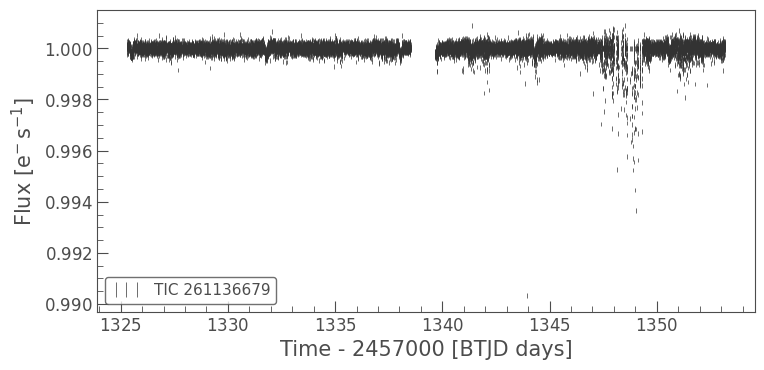

In [18]:
#Flattening 
flat_lc = lc.flatten(window_length=1001)
flat_lc.errorbar();

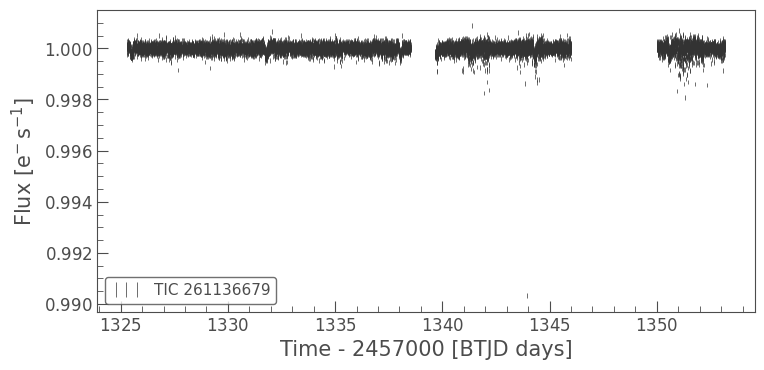

In [19]:
#Masking out the bad region (due to jitter in TESS telescope)
mask = (flat_lc.time < 1346) | (flat_lc.time > 1350)
masked_lc = flat_lc[mask]
masked_lc.errorbar();

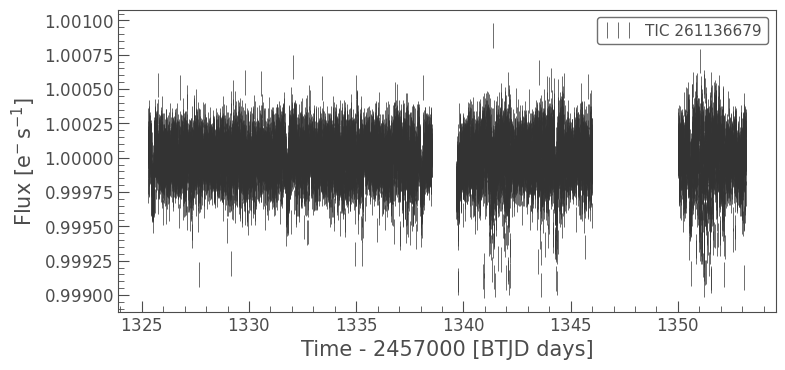

In [20]:
#Removing Outliers from the data
clipped_lc = masked_lc.remove_outliers(sigma=6)
clipped_lc.errorbar();

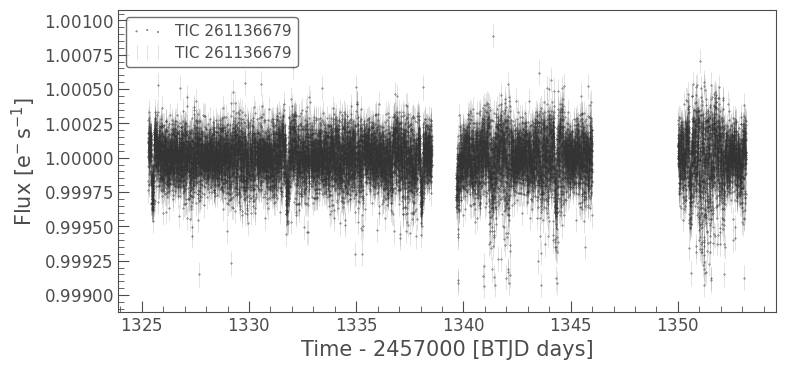

In [21]:
#Adding scatterplot as well
ax = clipped_lc.scatter(s=0.1)
clipped_lc.errorbar(ax=ax, alpha=0.2);

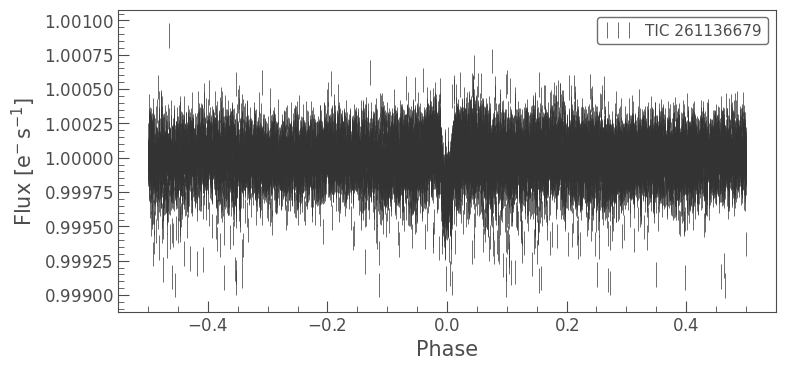

In [22]:
#Folding
folded_lc = clipped_lc.fold(period=6.27, t0=1325.504) 
folded_lc.errorbar()

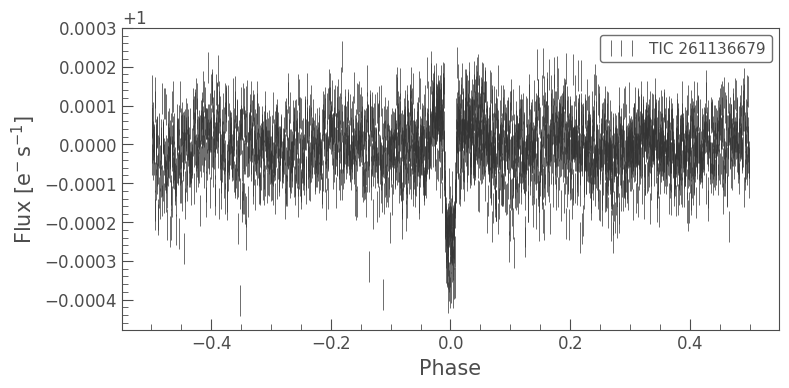

In [23]:
#Binning the LightCurve
binned_lc = folded_lc.bin(binsize=5)
binned_lc.errorbar();

### Part 2

Head over to the [NASA Exoplanet Archive](https://exoplanetarchive.ipac.caltech.edu/) that Joey showed us last week and select a confirmed planet (other than Pi Mensae) from the table that was found by TESS. Find the corresponding discovery paper to make sure the object was observed with a two-minute cadence. Use the TIC id to show the transit lightcurve here. Is selecting all the pixels above 85th percentile reasonable for your star? Make comparison plots between a set of three other percentile options of your choice. Which one provides the best lightcurve?

I have chosen the planet __Au Mic b__ (It is one of the most recently detected planet and may hold sectrets to planet formation)

#### Cadence: 
The TESS light curve from the 2-min cadence stamp was processed by the Science Processing Operations Center pipeline, a descendant of the Kepler mission pipeline based at the NASA Ames Research Center

### TIC: 441420236

In [15]:
from lightkurve import TessTargetPixelFile
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
amb_t0 = 1342.22 #2458342.22−2457000(julian day)
amb_period = 8.46321 #days

In [16]:
tpf = TessTargetPixelFile('MAST_2020-08-02T0813/TESS/tess2018206045859-s0001-0000000441420236-0120-s/tess2018206045859-s0001-0000000441420236-0120-s_tp.fits')

mission:  TESS
TIC:  441420236


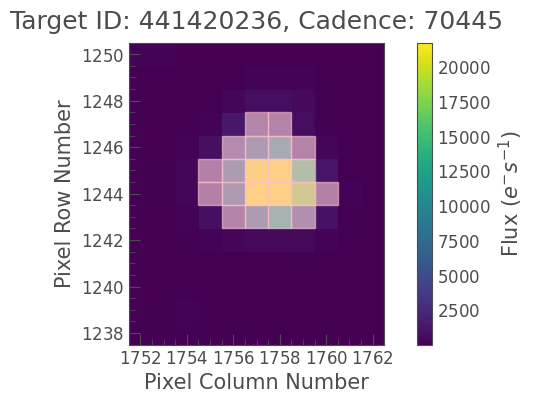

In [41]:
print("mission: ", tpf.mission)
print("TIC: ", tpf.targetid)

ax1 = tpf.plot(aperture_mask=tpf.pipeline_mask)

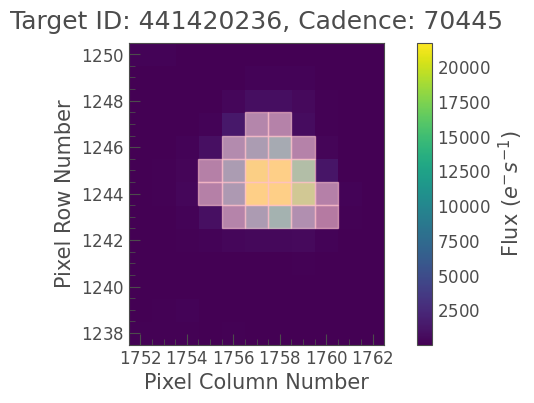

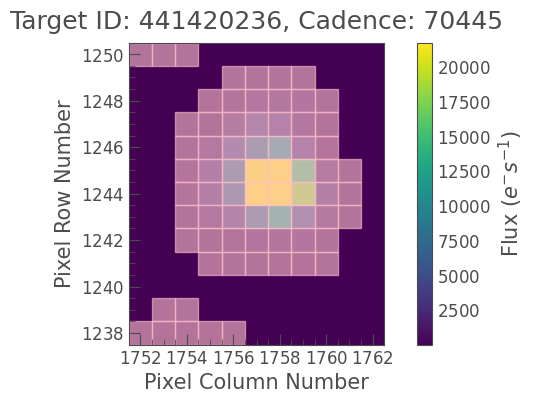

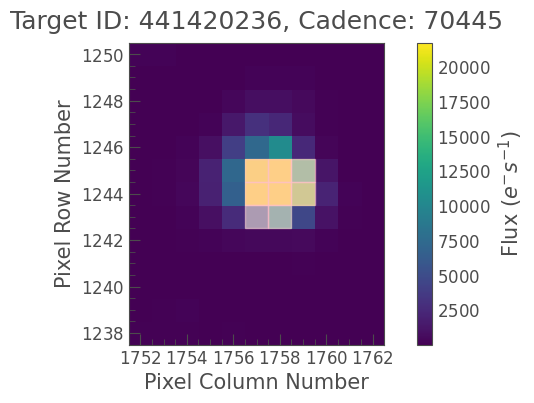

In [43]:
## Creating a custom mask with different percentiles
#Create a median image of the target object over time
median_image = np.nanmedian(tpf.flux, axis=0)
aperture_mask = median_image > np.nanpercentile(median_image, 85)
aperture_mask2 = median_image > np.nanpercentile(median_image, 50)
aperture_mask3 = median_image > np.nanpercentile(median_image, 95)
tpf.plot(aperture_mask=aperture_mask)
plt.savefig('AU-Mic-B-tpf.png', dpi=300)
tpf.plot(aperture_mask=aperture_mask2)
tpf.plot(aperture_mask=aperture_mask3)
#We will be using the 85 percentile mask (it covers most target pixels without wandering off too much)

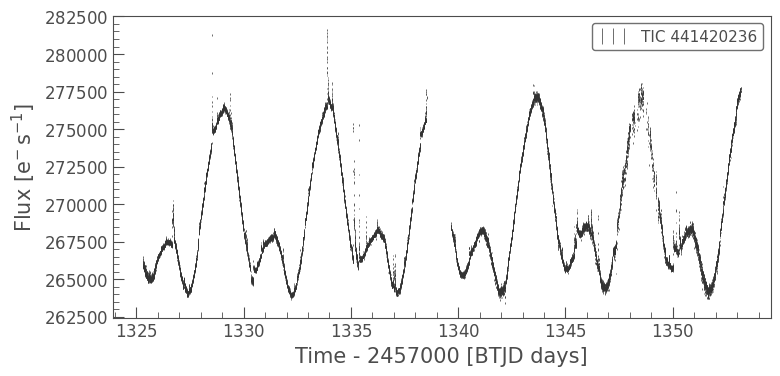

In [45]:
#Creating the first lightcurve
lc = tpf.to_lightcurve(aperture_mask=aperture_mask)
lc.errorbar()
plt.savefig('AUmicB_lc.png', dpi=300)

The plot is very close to the one presented in the [paper](https://arxiv.org/pdf/2006.13248.pdf)

(18104,)


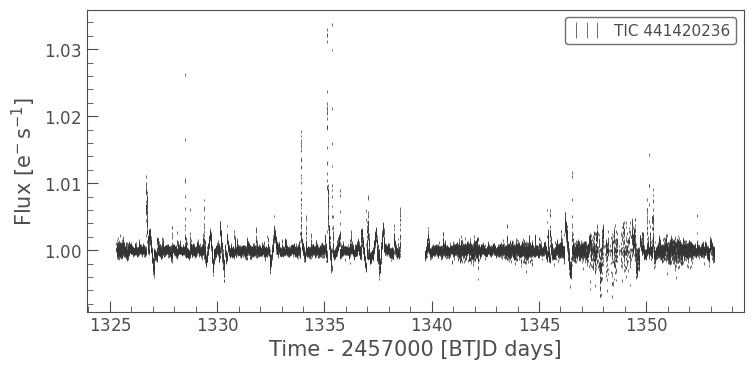

In [47]:
#Cleaning the stuff up because of huge flux variations
print(lc.time.shape)
#Setting 181 samples (~2% of the flux variations since the flattening should be higher 
##(due to such high magnitude variations)) for flattening
flat_lc = lc.flatten(window_length=401)
flat_lc.errorbar()
plt.savefig('AUmicB_flat_lc.png', dpi=300)

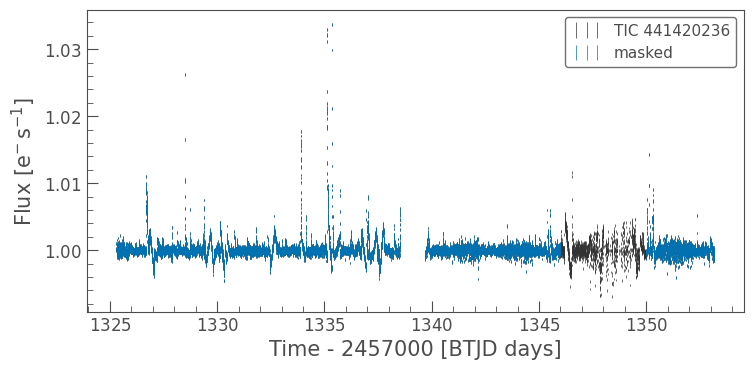

In [48]:
#Masking out the jitter areas
mask = (flat_lc.time < 1346) | (flat_lc.time > 1350)
masked_lc = flat_lc[mask]
ax = flat_lc.errorbar()
masked_lc.errorbar(ax=ax, label='masked');
plt.savefig('AUmicB_masked_lc.png', dpi=300)

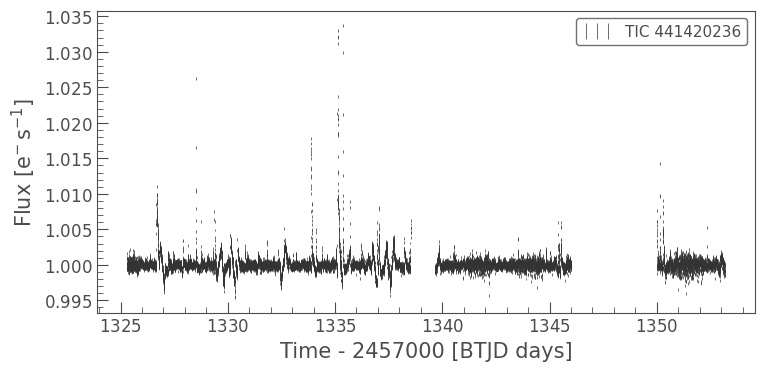

In [49]:
#Clipping Outliers
clipped_lc = masked_lc.remove_outliers(sigma=100)
clipped_lc.errorbar();
plt.savefig('AUmicB_clipped_lc.png', dpi=300)

In [119]:
## Adding a scatterplot to visualize data better

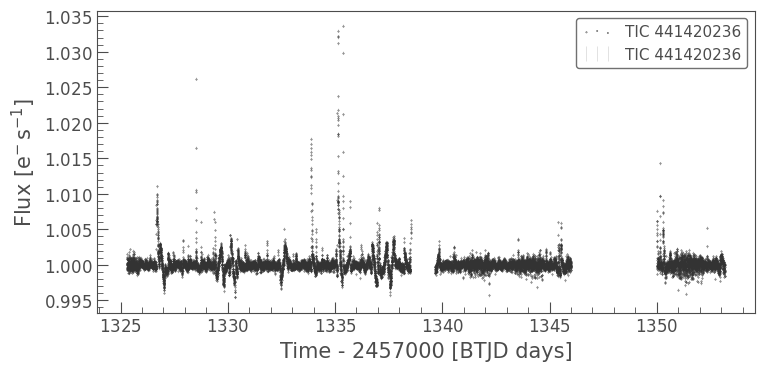

In [50]:
ax = clipped_lc.scatter(s=0.1)
clipped_lc.errorbar(ax=ax, alpha=0.2);
#clipped_lc.scatter()
plt.savefig('AUmicB_scatter_lc.png', dpi=300)

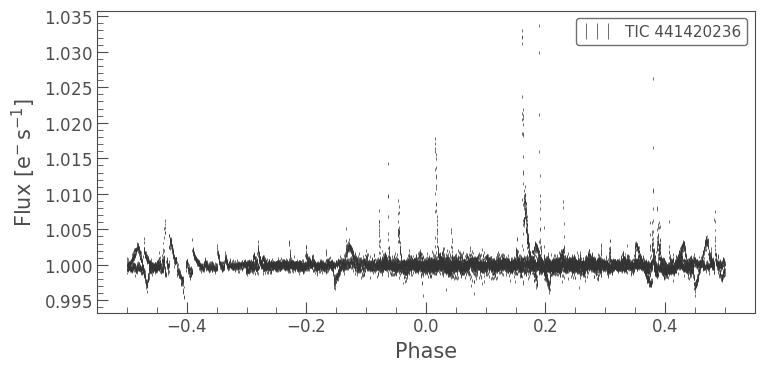

In [51]:
#Folding the data
folded_lc = clipped_lc.fold(period=amb_period, t0=amb_t0) #epoch_time has been replaced by t0
folded_lc.errorbar();
plt.savefig('AUmicB_folded_lc.png', dpi=300)

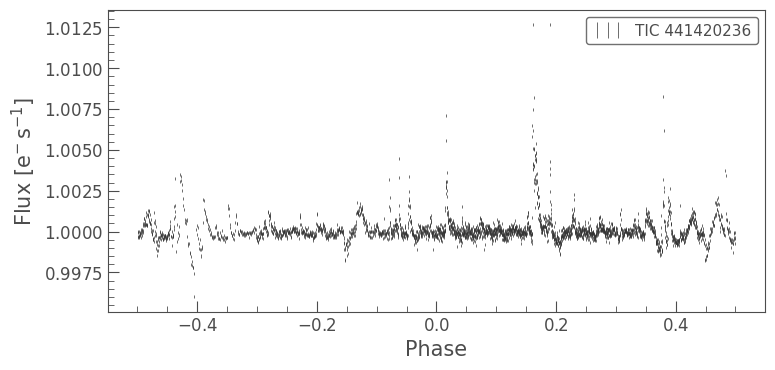

In [53]:
#Binning
binned_lc = folded_lc.bin(binsize=int(5))
binned_lc.errorbar();
plt.savefig('AUmicB_binned_lc.png', dpi=300)

In [83]:
# More apertures
aperture_mask1 = median_image > np.nanpercentile(median_image, 70)
aperture_mask2 = median_image > np.nanpercentile(median_image, 75)
aperture_mask3 = median_image > np.nanpercentile(median_image, 80)
aperture_mask4 = median_image > np.nanpercentile(median_image, 90)
aperture_mask5 = median_image > np.nanpercentile(median_image, 90)

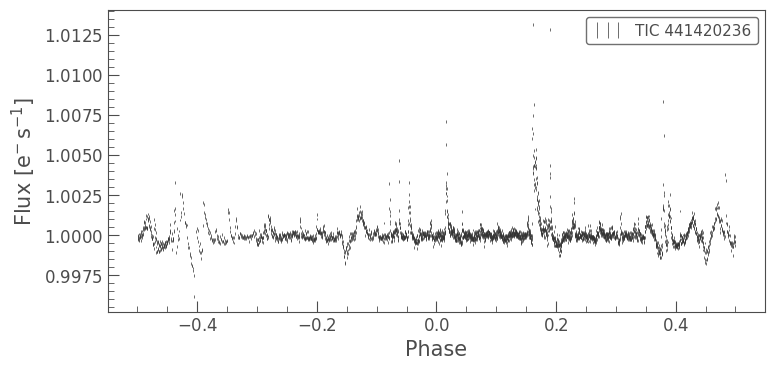

In [77]:
lc = tpf.to_lightcurve(aperture_mask=aperture_mask1).flatten(window_length=401)
lc = lc[(lc.time < 1346) | (lc.time > 1350)]
lc.remove_outliers(sigma=100).fold(period=amb_period, t0=amb_t0).bin(binsize=int((5*u.minute).value)).errorbar();

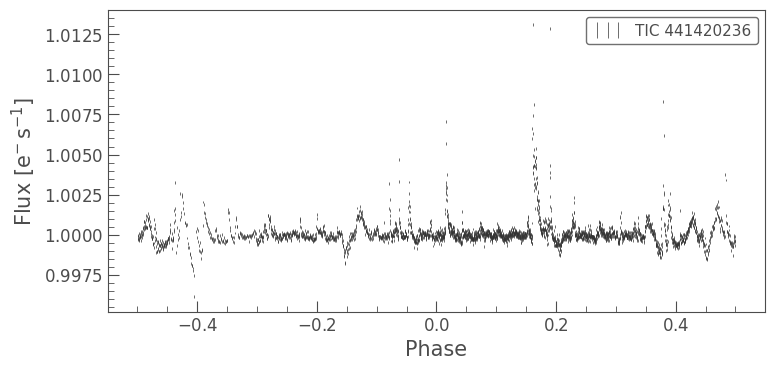

In [79]:
lc = tpf.to_lightcurve(aperture_mask=aperture_mask2).flatten(window_length=401)
lc = lc[(lc.time < 1346) | (lc.time > 1350)]
lc.remove_outliers(sigma=100).fold(period=amb_period, t0=amb_t0).bin(binsize=int((5*u.minute).value)).errorbar();

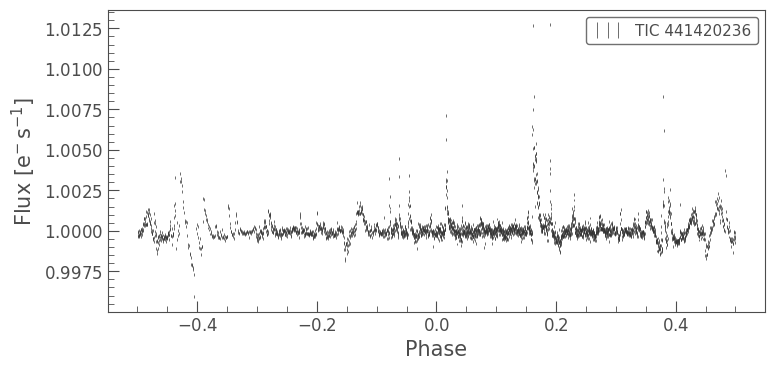

In [81]:
lc = tpf.to_lightcurve(aperture_mask=aperture_mask3).flatten(window_length=401)
lc = lc[(lc.time < 1346) | (lc.time > 1350)]
lc.remove_outliers(sigma=100).fold(period=amb_period, t0=amb_t0).bin(binsize=int((5*u.minute).value)).errorbar();

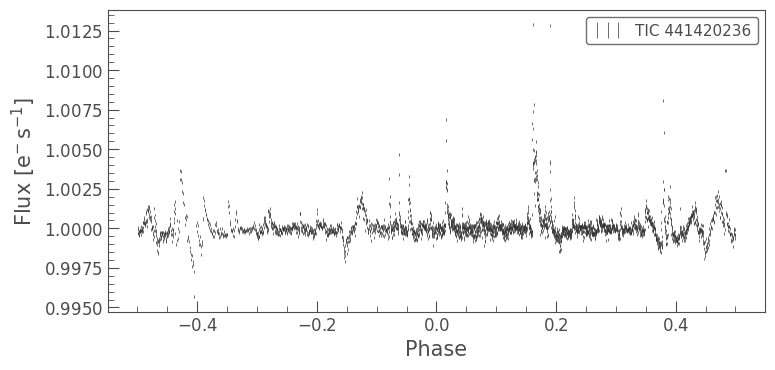

In [84]:
lc = tpf.to_lightcurve(aperture_mask=aperture_mask4).flatten(window_length=401)
lc = lc[(lc.time < 1346) | (lc.time > 1350)]
lc.remove_outliers(sigma=100).fold(period=amb_period, t0=amb_t0).bin(binsize=int((5*u.minute).value)).errorbar();

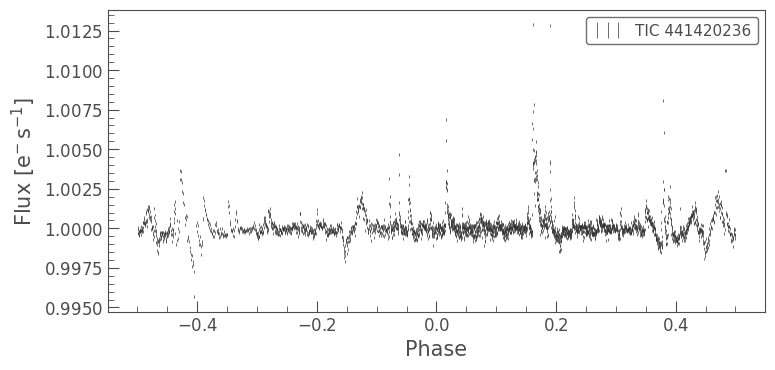

In [85]:
lc = tpf.to_lightcurve(aperture_mask=aperture_mask5).flatten(window_length=401)
lc = lc[(lc.time < 1346) | (lc.time > 1350)]
lc.remove_outliers(sigma=100).fold(period=amb_period, t0=amb_t0).bin(binsize=int((5*u.minute).value)).errorbar();

## We were not able to detect the transit due to the violent nature of the young star 

# To do the same, we will first need to flatten out the sinusoids (using fitting a sinusoid) occuring due to the Star Spots periodically appearing in our line of site as the star rotates